In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

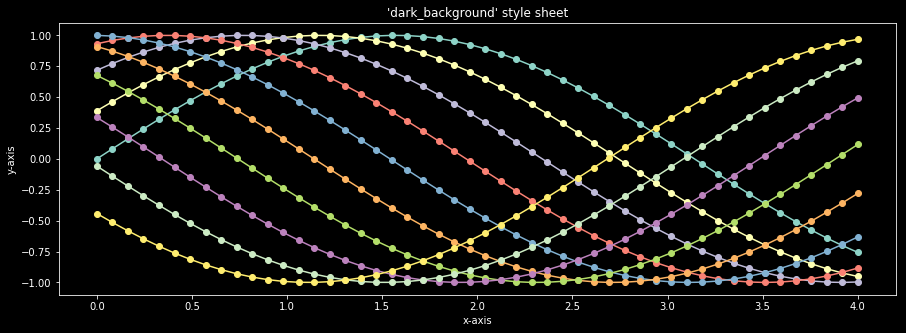

In [2]:
fig, ax = plt.subplots(figsize=(15,5))

L = 4
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax.plot(x, np.sin(x + s), 'o-')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("'dark_background' style sheet")

plt.show()

https://scikit-learn.org/stable/

In [0]:
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples=500, noise=0.1, random_state=1)

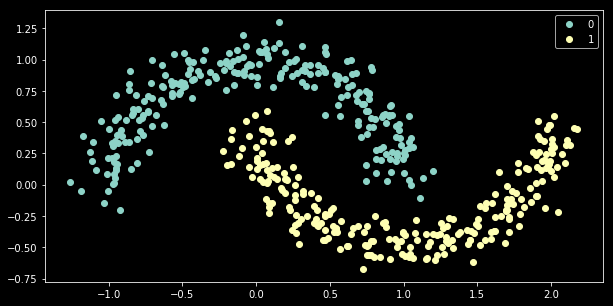

In [4]:
plt.figure(figsize=(10,5))
plt.plot(X[Y==0,0],X[Y==0,1],'o',label='0')
plt.plot(X[Y==1,0],X[Y==1,1],'o',label='1')
plt.legend();

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

20% of 80% is not 20

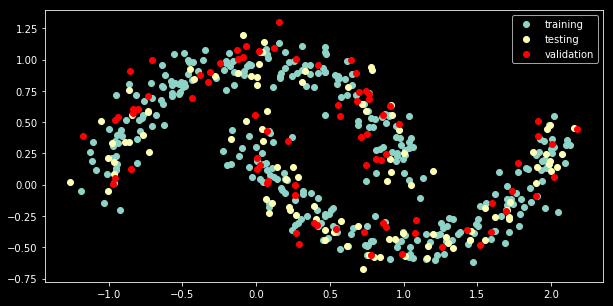

In [7]:
plt.figure(figsize=(10,5))
plt.plot(X_train[:,0],X_train[:,1],'o',label='training')
plt.plot(X_test[:,0],X_test[:,1],'o',label='testing')
plt.plot(X_val[:,0],X_val[:,1],'ro',label='validation')
plt.legend()

In [0]:
import tensorflow as tf

In [0]:
with tf.name_scope("placeholders"):
  x = tf.placeholder(tf.float32, (None, 2), name='coordinate') 
  y = tf.placeholder(tf.float32, (None,), name='classe')

name of x?

In [0]:
n_hidden = 10

with tf.name_scope("hidden-layer"):
  W = tf.Variable(tf.random_normal((2, n_hidden))) 
  b = tf.Variable(tf.random_normal((n_hidden,))) 
  x_hidden = tf.nn.relu(tf.matmul(x, W) + b)

 the sigmoid gives the class probability of 1 y_one_prob = tf.sigmoid(y_logit)

Rounding P(y=1) will give the correct prediction. y_pred = tf.round(y_one_prob)

In [0]:
with tf.name_scope("output"):
  W = tf.Variable(tf.random_normal((n_hidden, 1)))
  b = tf.Variable(tf.random_normal((1,)))
  y_logit = tf.matmul(x_hidden, W) + b

In [0]:
with tf.name_scope("loss"):
  # Compute the cross-entropy term for each datapoint
  y_expand = tf.expand_dims(y, 1)
  entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y_expand) # Sum all contributions
  l = tf.reduce_sum(entropy)

Expand what?

https://en.wikipedia.org/wiki/Cross_entropy

In [0]:
learning_rate = 0.01

with tf.name_scope("optim"):
  train_op = tf.train.AdamOptimizer(learning_rate).minimize(l)

![picture](https://raw.githubusercontent.com/MLJCUnito/Tensorshow/master/FirstSession/Immagini/gradient-overview.png)

![picture](http://ruder.io/content/images/2016/09/saddle_point_evaluation_optimizers.gif)

Tensorboard

In [0]:
with tf.name_scope("summaries"): 
  tf.summary.scalar("loss", l)
  write_op = tf.summary.merge_all()
  

saver = tf.train.Saver()

`tensorboard --logdir ./log --host 0.0.0.0 --port 6006`

http://localhost:6006/

In [23]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-06-06 10:50:36--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.71.139.107, 54.152.127.232, 52.203.66.95, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.71.139.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.88M  64.0MB/s    in 0.2s    

2019-06-06 10:50:37 (64.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [16648024/16648024]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')

In [25]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://62627e3b.ngrok.io


In [26]:
tf.summary.FileWriter("./log",tf.get_default_graph())

In [0]:
writer_1 = tf.summary.FileWriter("./log/train_plot")
writer_2 = tf.summary.FileWriter("./log/validation_plot")

Let the training Begin

In [28]:
X_train.shape

(320, 2)

In [29]:
step=0
n_epochs = 1000
batch_size = 100

N = X_train.shape[0]
init = tf.global_variables_initializer()


with tf.Session() as sess:
  
  sess.run(init)
  best_loss = sess.run(l,feed_dict={x: X_train, y: y_train})
  
  for epoch in range(n_epochs):
    pos=0
    step = 0
    
    while pos < N:
      
      batch_X = X_train[pos:pos+batch_size]
      batch_y = y_train[pos:pos+batch_size]
      
      feed_dict = {x: batch_X, y: batch_y}   
      sess.run(train_op, feed_dict=feed_dict) 
      step += 1
      pos += batch_size
      
    [val_summary,val_loss] = sess.run([write_op,l],feed_dict={x: X_val, y:y_val})
    writer_1.add_summary(val_summary, epoch)
    writer_1.flush()
    
    [train_summary,train_loss] = sess.run([write_op,l],feed_dict={x: X_train, y:y_train})
    writer_2.add_summary(train_summary, epoch)
    writer_2.flush()
      
  save_path = saver.save(sess, "/content/model.ckpt") 
  
print("epoch %d, train_loss %d, val_loss: %f" % (epoch, train_loss, val_loss)) 

epoch 999, train_loss 0, val_loss: 0.055076


In [0]:
def plot_decision_boundary(X, Y, cmap='autumn'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    out = tf.nn.sigmoid(y_logit)
    
    with tf.Session() as sess:
      #sess.run(init)
      saver.restore(sess, "/content/model.ckpt")
      Z = sess.run(out,feed_dict={x:(np.c_[xx.ravel(), yy.ravel()])})
    
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,7))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.9)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

INFO:tensorflow:Restoring parameters from /content/model.ckpt


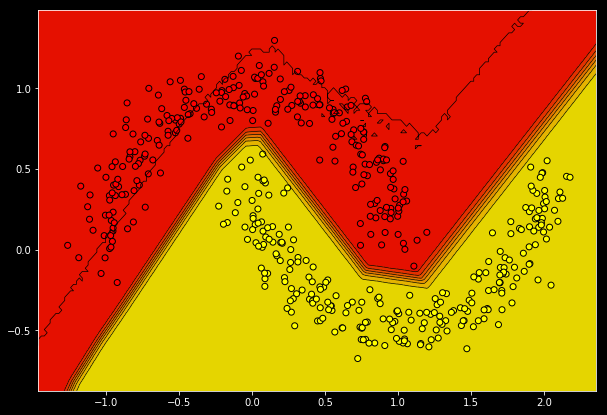

In [32]:
plot_decision_boundary(X,Y)